# Analyzing Success Factors in Bangalore Restaurants

# OBJECTIVE

The objective of the project is to analyze a dataset containing information about restaurants in Bangalore, India. The project aims to uncover insights into the factors that influence the success of these restaurants. This analysis could involve various tasks such as:

1. Exploratory Data Analysis (EDA): Understanding the distribution and relationships among different features in the dataset.
2. Clustering Analysis: Identifying groups or clusters of restaurants based on their attributes such as ratings, cost, and cuisine types.
3. Dimensionality Reduction: Using techniques like PCA (Principal Component Analysis) to reduce the dimensionality of the dataset and extract important features.
4. Performance Evaluation: Assessing the performance of clustering algorithms using metrics like the Davies–Bouldin index and the elbow method.
5. Visualization: Creating visualizations such as scatter plots, dendrograms, and bar plots to interpret and present the findings of the analysis.

Overall, the project aims to provide valuable insights to restaurant owners, investors, and stakeholders in the food industry to help them make informed decisions and improve the success of their businesses.

# INTRODUCTION
This project aims to analyze the success factors influencing restaurants in Bangalore, India. With over 12,000 restaurants catering to a diverse population, understanding the key drivers of success is crucial for both new and established eateries. Through data analysis techniques such as clustering, dimensionality reduction, and evaluation metrics like Davies–Bouldin index, the project seeks to uncover insights that can help restaurateurs thrive in this competitive market.

# DATA DESCRIPTION

- Size: 51717 entries × 17 columns = 878,889 data points
- Shape: The data has 51717 rows (entries) and 17 columns.

Index variable - url

Categorical (Nominal) Variables:
1. url
2. address
3. name
4. online_order
5. book_table
6. phone
7. location
8. rest_type
9. dish_liked
10. cuisines
11. reviews_list
12. menu_item
13. listed_in(type)
14. listed_in(city)

Categorical (Ordinal) Variable:
None

In [2]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.5/99.8 MB 10.0 MB/s eta 0:00:10
                                              0.8/99.8 MB 8.6 MB/s eta 0:00:12
                                              1.1/99.8 MB 8.1 MB/s eta 0:00:13
                                              1.5/99.8 MB 7.8 MB/s eta 0:00:13
                                              1.8/99.8 MB 7.8 MB/s eta 0:00:13
                                              2.2/99.8 MB 7.6 MB/s eta 0:00:13
                                              2.5/99.8 MB 7.6 MB/s eta 0:00:13
     -                                        2.8/99.8 MB 7.5 MB/s eta 0:00:13
     -                                        3.2/99.8 MB 7.5 MB/s eta 0:00:13
     -                                        3.5/99.8 MB 7.5 MB/s eta 0:00:13
     -                                        3.9/99.8 MB 7.4 MB/s eta 0:00:13
     -                                        4.2/99.8 MB 

In [8]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install catboost

                                              0.0/101.1 MB ? eta -:--:--
                                             0.4/101.1 MB 13.9 MB/s eta 0:00:08
                                             0.8/101.1 MB 10.0 MB/s eta 0:00:11
                                              1.2/101.1 MB 9.2 MB/s eta 0:00:11
                                              1.4/101.1 MB 8.2 MB/s eta 0:00:13
                                              1.7/101.1 MB 7.9 MB/s eta 0:00:13
                                              2.1/101.1 MB 7.9 MB/s eta 0:00:13
                                              2.5/101.1 MB 7.9 MB/s eta 0:00:13
     -                                        2.6/101.1 MB 7.3 MB/s eta 0:00:14
     -                                        3.0/101.1 MB 7.7 MB/s eta 0:00:13
     -                                        3.4/101.1 MB 7.5 MB/s eta 0:00:14
     -                                        3.8/101.1 MB 7.5 MB/s eta 0:00:13
     -                                        4

In [10]:
pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [64]:
data = pd.read_csv('zomato.csv')

In [65]:
df = data.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

DATASET STORY
Bangalore boasts a vibrant culinary scene with over 12,000 restaurants offering a diverse array of cuisines from around the globe. The Zomato Bangalore Restaurants dataset aims to uncover the pivotal factors influencing the success of these dining establishments.

As India's largest IT hub, Bangalore is often hailed as the Silicon Valley of the country. The city's population is predominantly comprised of migrants who rely heavily on restaurant meals due to time constraints. With the continuous influx of newcomers and the rising demand for dining options, the restaurant industry in Bangalore remains dynamic and competitive. However, despite the growing demand, emerging restaurants face challenges in competing with well-established counterparts.

In [67]:
# dropping duplicated restaurants
df = df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

In [68]:
# these are actually numerical values seen as strings, we made some string operations to put them in the right format
df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].str.replace(',', '')).astype('float64')

df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = (df['rate'].str.rstrip('/5')).astype('float64')


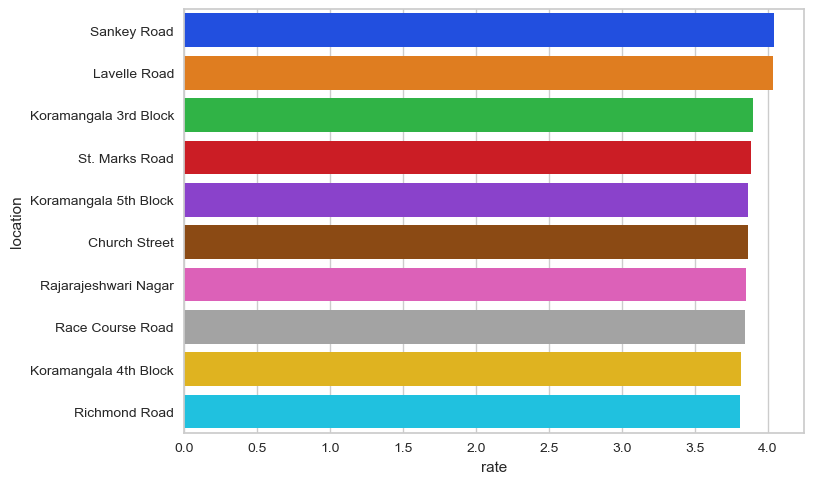

In [69]:
# location vs rate barplot
loc_rate = pd.DataFrame(df.groupby(['location'])['rate'].mean().sort_values(ascending=False).head(10))
loc_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='location', data=loc_rate, palette="bright")

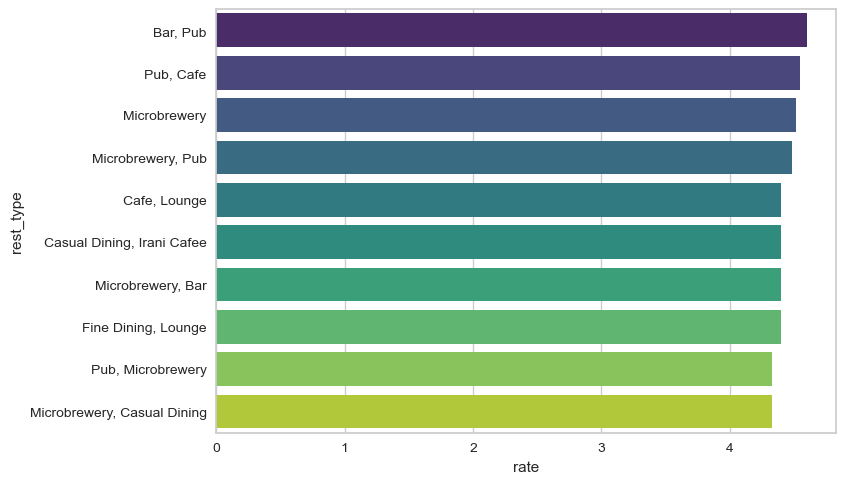

In [70]:
# rest_type vs rate barplot
restype_rate = pd.DataFrame(df.groupby(['rest_type'])['rate'].mean().sort_values(ascending=False).head(10))
restype_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='rest_type', data=restype_rate, palette="viridis")

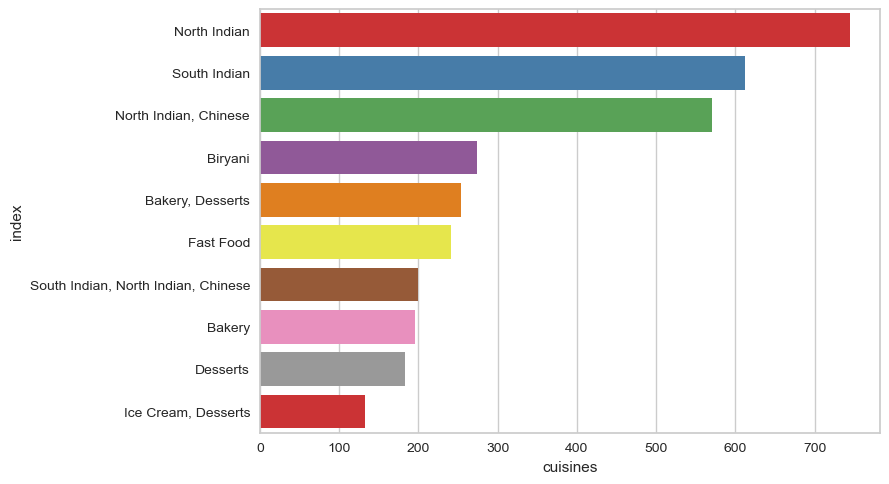

In [71]:
# cuisines barplot
cuisine_count = pd.DataFrame(df['cuisines'].value_counts().sort_values(ascending=False)[:10])
cuisine_count.reset_index(inplace=True)
ax = sns.barplot(y='index', x='cuisines', data=cuisine_count, palette="Set1")

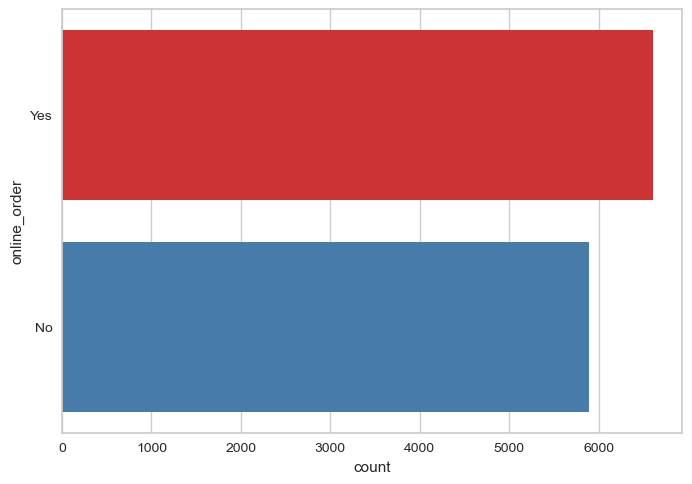

In [72]:
# online_order countplot
ax = sns.countplot(y='online_order', data=df, palette="Set1")

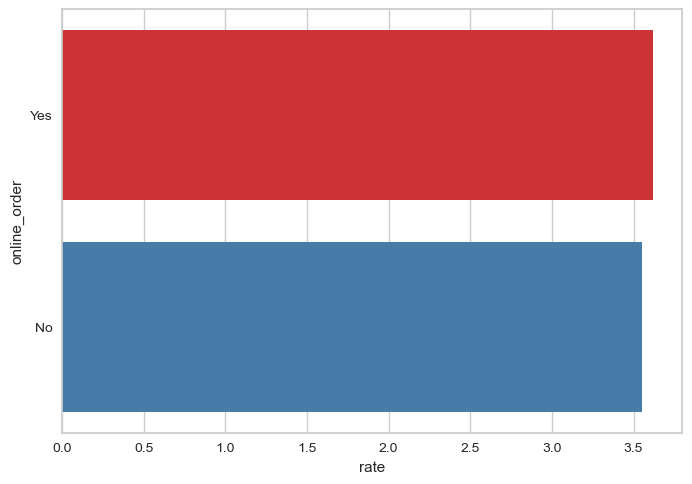

In [73]:
# online_order vs rate
online_rate = pd.DataFrame(df.groupby(['online_order'])['rate'].mean().sort_values(ascending=False).head(10))
online_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='online_order', data=online_rate, palette="Set1")

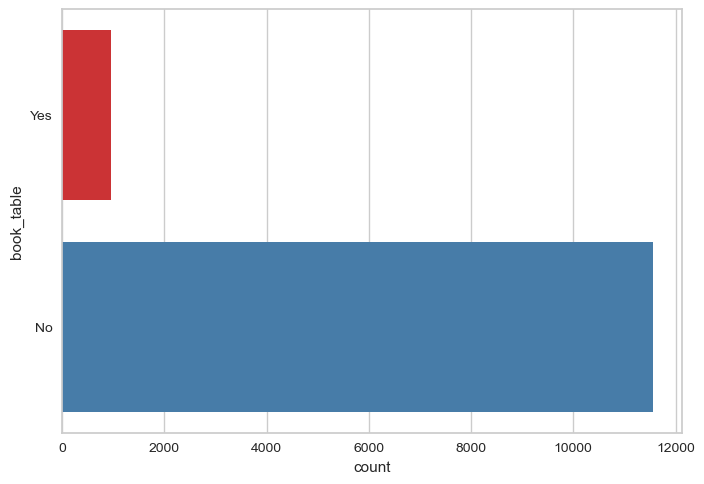

In [74]:
# book_table countplot
ax = sns.countplot(y='book_table', data=df, palette="Set1")

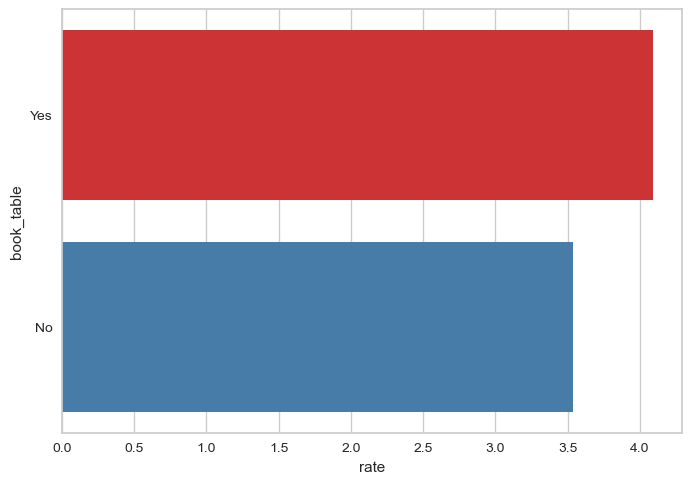

In [75]:
# book_table vs rate
book_rate = pd.DataFrame(df.groupby(['book_table'])['rate'].mean().sort_values(ascending=False).head(10))
book_rate.reset_index(inplace=True)
ax = sns.barplot(x='rate', y='book_table', data=book_rate, palette="Set1")

In [76]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 12499
Variables: 17
cat_cols: 3
num_cols: 3
cat_but_car: 11
num_but_cat: 0


In [77]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
    
df.isnull().sum().sort_values(ascending=False)

dish_liked                     7891
rate                           3183
phone                           267
rest_type                        63
approx_cost(for two people)      59
cuisines                         19
location                          9
listed_in(type)                   0
menu_item                         0
reviews_list                      0
url                               0
address                           0
votes                             0
book_table                        0
online_order                      0
name                              0
listed_in(city)                   0
dtype: int64

In [78]:
# dropping missing rates, we have enough data and we'll be using tree methods
df.dropna(subset=['rate'], inplace=True)

In [79]:
# Percentages of missing values
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_values_table(df)

                             n_miss  ratio
dish_liked                     4739  50.87
phone                           167   1.79
rest_type                        37   0.40
approx_cost(for two people)      32   0.34
cuisines                          3   0.03


In [80]:
# we will drop the missing values for some features those have % 0.01 missing values.
df.dropna(subset=['rest_type', 'approx_cost(for two people)', 'cuisines'], inplace=True)

In [81]:
# new feature: number of the cuisines in restaurants
df['num_of_cuisines'] = [len(cui) for cui in df['cuisines'].str.split(',')]
# new feature: number of the dishes liked in restaurants
df['num_of_dish_liked'] = [len(dish) if dish is not np.NAN else 0 for dish in df['dish_liked'].str.split(',')]

In [82]:
# No measurement point, high cardinality.
df.drop('dish_liked', axis=1, inplace=True)
df.drop('cuisines', axis=1, inplace=True)

In [83]:
# Rare Encoding
def rare_encoder(dataframe, cat_cols, rare_perc=0.01):
    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(dataframe) < rare_perc).sum() > 1]

    for col in rare_columns:
        tmp = dataframe[col].value_counts() / len(dataframe)
        rare_labels = tmp[tmp < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), 'Rare', dataframe[col])

    return dataframe
# the percentages that i decide for thresholds: location 0.03, rest_type 0.02, cuisines 0.01
rare_encoder(df, ['location'], rare_perc=0.03)
rare_encoder(df, ['rest_type'], rare_perc=0.02)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),num_of_cuisines,num_of_dish_liked
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Rare,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,7
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Rare,Casual Dining,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,7
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Rare,Rare,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,7
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Rare,Quick Bites,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Rare,Casual Dining,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,https://www.zomato.com/bangalore/nawabs-empire...,"107/PA, ITPL Main Road, Whitefield, Bangalore",Nawabs Empire,No,No,3.2,5,+91 8123358857,Rare,Quick Bites,300.0,"[('Rated 1.0', 'RATED\n This place is not at ...",[],Dine-out,Whitefield,4,0
12493,https://www.zomato.com/bangalore/fujian-expres...,"Food Court, Ascendas Park Square Mall, Whitefi...",Fujian Express,Yes,No,3.8,182,+91 7760075458\n+91 9591852291,Rare,Rare,600.0,"[('Rated 4.0', 'RATED\n This restaurant speci...","['Schezawn Paneer Dry', 'Gobi Manchurian Dry',...",Dine-out,Whitefield,3,7
12495,https://www.zomato.com/bangalore/nook-aloft-be...,"Cessna Business Park, Sarjapur ÃÂÃÂÃÂÃÂ...",Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,+91 9663517066\n+91 9686861135,Rare,Casual Dining,1800.0,"[('Rated 2.0', 'RATED\n Aloft has been design...",[],Dine-out,Whitefield,3,7
12496,https://www.zomato.com/bangalore/seeya-restaur...,"44, Kodigehalli to Hoodi Main Road, Mahadevapu...",SeeYa Restaurant,No,No,3.3,4,+91 9164562939,Rare,Quick Bites,350.0,"[('Rated 4.0', 'RATED\n Good food, take bit t...",[],Dine-out,Whitefield,3,0


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,9244.0,3.593758,0.452281,1.8,3.2,3.7,3.90,4.9
votes,9244.0,243.084055,676.250369,0.0,16.0,53.0,191.25,16345.0
approx_cost(for two people),9244.0,537.113695,426.862818,40.0,300.0,400.0,600.00,6000.0
num_of_cuisines,9244.0,2.419191,1.232237,1.0,2.0,2.0,3.00,8.0
num_of_dish_liked,9244.0,2.521095,3.001260,0.0,0.0,0.0,7.00,7.0


In [85]:
# The mean and the median of rate is nearly the same. We're gonna use 3.7 as threshold for labelling 
# the restaurants as successful or not.
df['label'] = df['rate'].apply(lambda x: 1 if x >= 3.7 else 0)
df.drop('rate', axis=1, inplace=True)
df['label'].value_counts()/len(df)
# the proportions of labels are 0.51 and 0.49

1    0.506599
0    0.493401
Name: label, dtype: float64

In [86]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
for col in ['num_of_cuisines', 'num_of_dish_liked']:
    num_cols.append(col)

Observations: 9244
Variables: 17
cat_cols: 8
num_cols: 2
cat_but_car: 7
num_but_cat: 3


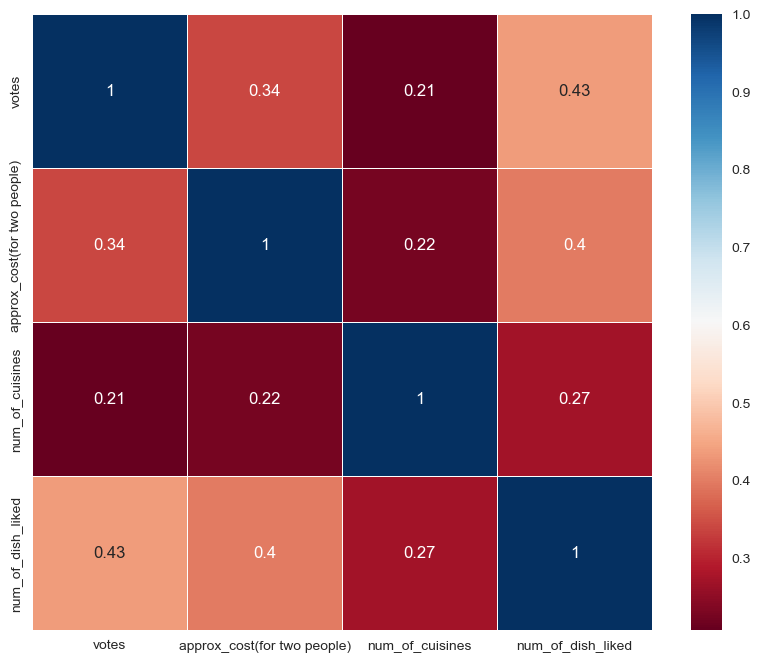

In [87]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)
    
correlation_matrix(df, num_cols)
# We don't have any high correlations in our numerical variables

In [88]:
# There are slight differences in data preprocessing in this part

df = data.copy()
df = df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

# We can drop some columns those have no useful data.
drop_list = ['url', 'address', 'phone', 'reviews_list', 'menu_item', 'name', 'listed_in(city)', 'listed_in(type)']
df.drop(drop_list, axis=1, inplace=True)

df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].str.replace(',', '')).astype('float64')

df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = (df['rate'].str.rstrip('/5')).astype('float64')

# dropping missing rates, we have enough data
df.dropna(subset=['rate'], inplace=True)

# we will drop the missing values for some features those have % 0.01 missing values.
df.dropna(subset=['rest_type', 'approx_cost(for two people)', 'cuisines'], inplace=True)

# new feature: number of the cuisines in restaurants
df['num_of_cuisines'] = [len(cui) for cui in df['cuisines'].str.split(',')]
# new feature: number of the dishes liked in restaurants
df['num_of_dish_liked'] = [len(dish) if dish is not np.NAN else 0 for dish in df['dish_liked'].str.split(',')]

# No measurement point, high cardinality.
df.drop('dish_liked', axis=1, inplace=True)
df.drop('cuisines', axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(df)

for col in ['num_of_cuisines', 'num_of_dish_liked']:
    num_cols.append(col)
num_cols.pop(0)  # rate
# We're gonna do clustering, so we're not gonna use the target feature

Observations: 9244
Variables: 9
cat_cols: 4
num_cols: 3
cat_but_car: 2
num_but_cat: 2


'rate'

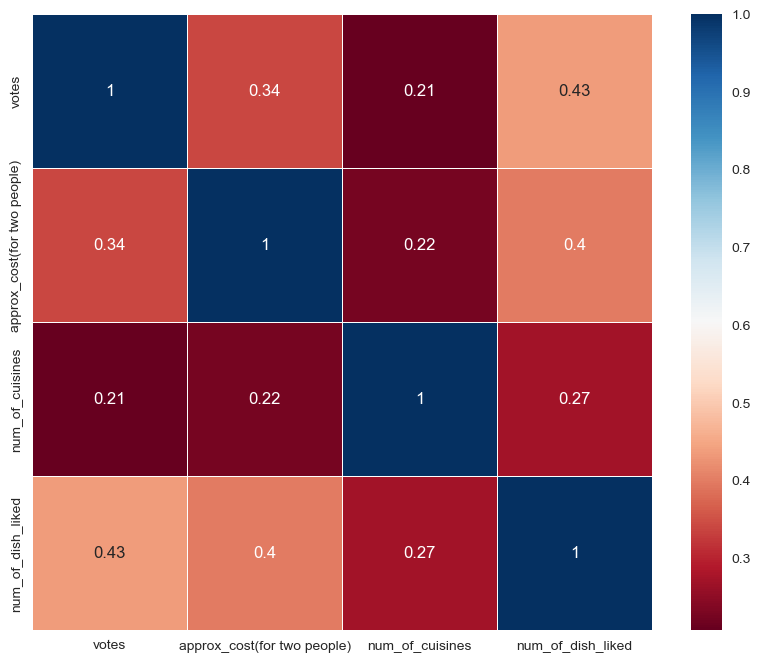

In [89]:
correlation_matrix(df, num_cols)
# We don't have any high correlations in our numerical variables

<Axes: xlabel='votes'>

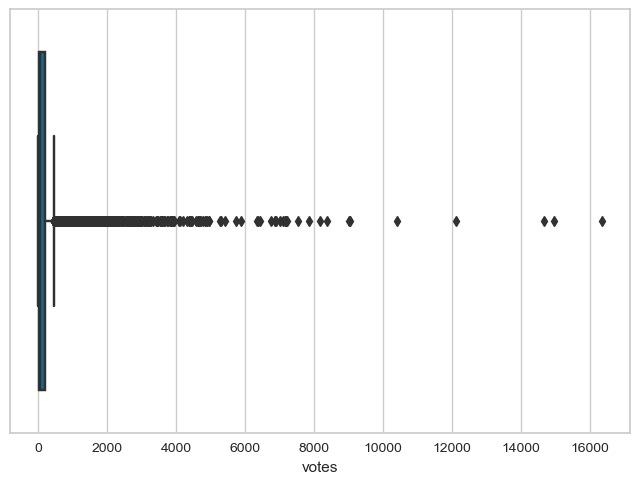

In [90]:
# Boxplot
# One of the best ways of checking for outliers is Boxplot
df["votes"].describe([0.05, 0.25, 0.45, 0.50, 0.65, 0.75, 0.95, 0.99]).T
sns.boxplot(x=df["votes"])

<Axes: xlabel='approx_cost(for two people)'>

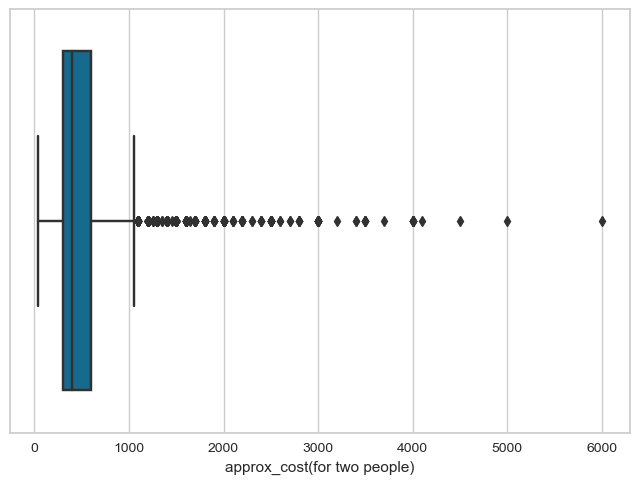

In [91]:
df["approx_cost(for two people)"].describe([0.05, 0.25, 0.45, 0.50, 0.65, 0.75, 0.95, 0.99]).T
sns.boxplot(x=df["approx_cost(for two people)"])

In [92]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [93]:
remove_outlier(df, 'votes')
remove_outlier(df, 'approx_cost(for two people)')

,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),num_of_cuisines,num_of_dish_liked
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,3,7
1,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,3,7
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,3,7
3,No,No,3.7,88,Banashankari,Quick Bites,300.0,2,1
4,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,2,2
...,...,...,...,...,...,...,...,...,...
12492,No,No,3.2,5,"ITPL Main Road, Whitefield",Quick Bites,300.0,4,0
12493,Yes,No,3.8,182,"ITPL Main Road, Whitefield",Food Court,600.0,3,7
12495,No,Yes,4.2,411,Bellandur,Casual Dining,1800.0,3,7
12496,No,No,3.3,4,KR Puram,Quick Bites,350.0,3,0


In [94]:
inv_df = df
df = df[num_cols]

# Min-Max Scaler
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [95]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)
df = pd.DataFrame(pca_fit)

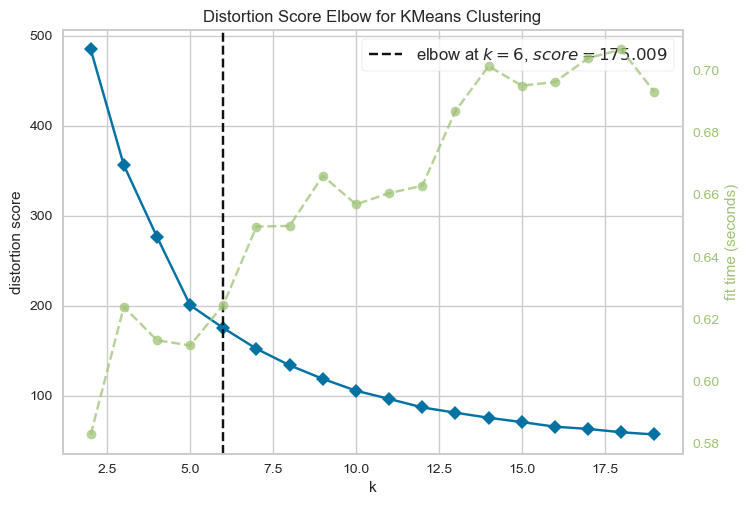

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
# Detecting Optimal Cluster Number

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

Distortion Score:
- The distortion score is a measure of how tightly packed the clusters are. I calculate it as the sum of squared distances between each data point and its respective cluster center (centroid).
- Lower distortion scores indicate better clustering, as they suggest that data points are closer to their assigned centroids.

Elbow Point:
- The elbow point refers to the point on the plot of distortion scores versus the number of clusters where the rate of decrease in distortion starts to diminish significantly.
- I call it the elbow point because the plot often resembles an arm bent at the elbow, where the "bend" represents the optimal number of clusters.
- This point is considered optimal because it balances the trade-off between increasing the number of clusters (which can lead to overfitting) and minimizing the distortion score.

In my specific plot, I've identified the elbow point to be around k=5. This suggests that using 5 clusters might be a reasonable choice for K-Means clustering in this case.

However, it's crucial to note that the elbow method is heuristic, meaning it provides a rule of thumb rather than a precise mathematical solution. The optimal number of clusters may vary depending on the dataset, the specific clustering task, and other factors.

In summary, while the elbow method provides a useful guideline for choosing the number of clusters, I always ensure to validate the chosen number of clusters using domain knowledge and additional evaluation metrics.

In [97]:
elbow.elbow_value_

6

The attribute `elbow_value_` with a result of 6 indicates that the elbow method, used to determine the optimal number of clusters for K-means clustering, suggests that the dataset may be best represented by 6 clusters. 

In the context of this analysis, this means that dividing the data into 6 distinct clusters may provide the most meaningful and representative grouping of the restaurants based on the features used for clustering. However, it's important to note that the determination of the optimal number of clusters is not always definitive, and it's often necessary to assess the results with domain knowledge and possibly experiment with different numbers of clusters to find the most suitable solution.

In [98]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)
kumeler = kmeans.labels_

df["CLUSTER_NO"] = kumeler
df["CLUSTER_NO"] = df["CLUSTER_NO"] + 1

df.head()

,0,1,2,CLUSTER_NO
0,0.647502,-0.001768,0.000717,2
1,0.647533,-0.001755,0.000828,2
2,0.647873,-0.001603,0.002032,2
3,-0.225685,-0.031974,-0.022477,1
4,-0.080882,-0.048726,0.018308,1


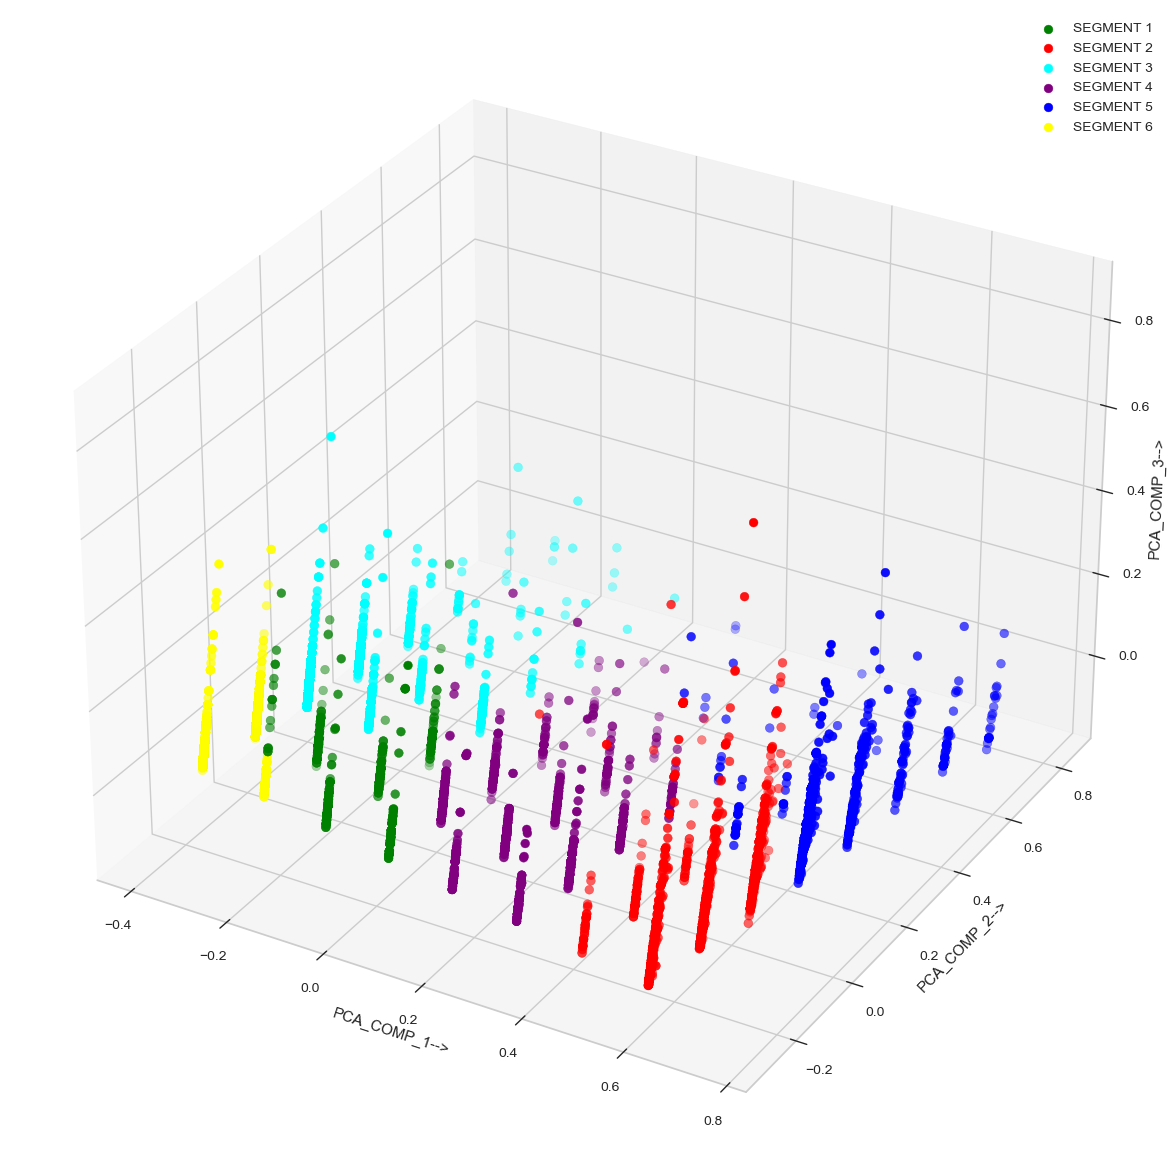

In [99]:
# 3d scatterplot using Matplotlib
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.loc[df['CLUSTER_NO'] == 1, 0], df.loc[df['CLUSTER_NO'] == 1, 1], df.loc[df['CLUSTER_NO'] == 1, 2],
           s=40, color='green', label="SEGMENT 1")
ax.scatter(df.loc[df['CLUSTER_NO'] == 2, 0], df.loc[df['CLUSTER_NO'] == 2, 1], df.loc[df['CLUSTER_NO'] == 2, 2],
           s=40, color='red', label="SEGMENT 2")
ax.scatter(df.loc[df['CLUSTER_NO'] == 3, 0], df.loc[df['CLUSTER_NO'] == 3, 1], df.loc[df['CLUSTER_NO'] == 3, 2],
           s=40, color='cyan', label="SEGMENT 3")
ax.scatter(df.loc[df['CLUSTER_NO'] == 4, 0], df.loc[df['CLUSTER_NO'] == 4, 1], df.loc[df['CLUSTER_NO'] == 4, 2],
           s=40, color='purple', label="SEGMENT 4")
ax.scatter(df.loc[df['CLUSTER_NO'] == 5, 0], df.loc[df['CLUSTER_NO'] == 5, 1], df.loc[df['CLUSTER_NO'] == 5, 2],
           s=40, color='blue', label="SEGMENT 5")
ax.scatter(df.loc[df['CLUSTER_NO'] == 6, 0], df.loc[df['CLUSTER_NO'] == 6, 1], df.loc[df['CLUSTER_NO'] == 6, 2],
           s=40, color='yellow', label="SEGMENT 6")

ax.set_xlabel('PCA_COMP_1-->')
ax.set_ylabel('PCA_COMP_2-->')
ax.set_zlabel('PCA_COMP_3-->')
ax.legend()

Data Summary: From the 3D scatter plot, I can see the results of a principal component analysis (PCA) applied to our dataset, likely the restaurant data we've been working with. The x, y, and z axes represent the first three principal components, which essentially capture the most significant variations in our original data. Each point on the plot represents a restaurant from our dataset.

Explained Variance: Looking at the labels in the image, it seems that the points are colored based on the value of the 6th principal component. Meanwhile, the text on the axes indicates that the first three principal components (PC1, PC2, and PC3) explain 41.9%, 18.4%, and 12.3% of the variance in our data, respectively. So collectively, these three components explain about 72.6% of the variance in our original data.

Observations: The data points seem to be scattered all over the 3D space, suggesting that there's quite a bit of variation among restaurants when it comes to the features represented by these principal components. However, I'm not noticing any clear separation or clustering of the data points, which could mean that our restaurants might not neatly fall into distinct categories based on these features.Additionally, the coloring of the data points by the 6th principal component doesn't seem to reveal any obvious patterns. Without more context about our dataset and what these features represent, it's challenging to interpret the meaning behind this coloring.

Limitations: I should keep in mind that PCA is a linear transformation, so the relationships between the data points in this plot might not perfectly reflect the relationships in the original high-dimensional space. Also, visualizing high-dimensional data in just 3D can be limiting, so there might be nuances in the data that aren't fully captured in this plot.

In [101]:
# Cluster Analysis
df.shape
inv_df.shape

inv_df['CLUSTER_NO'] = df['CLUSTER_NO'].astype('int64')
inv_df.head()
fin_df = inv_df.groupby('CLUSTER_NO')['rate', 'votes', 'approx_cost(for two people)', 'num_of_dish_liked',
                                      'num_of_cuisines'].mean()
fin_df.sort_values(by='rate', ascending=False)

,rate,votes,approx_cost(for two people),num_of_dish_liked,num_of_cuisines
CLUSTER_NO,,,,,
5.0,3.606656,289.204659,528.369384,2.753744,2.447587
2.0,3.605648,256.984187,554.668675,2.805723,2.457831
6.0,3.601043,275.931007,532.189731,2.641797,2.422784
3.0,3.587170,267.370140,532.153966,2.584759,2.477449
1.0,3.583368,255.640657,552.443532,2.507187,2.470226
4.0,3.552285,181.513441,514.112903,2.467742,2.400538


1. Cluster Analysis:
   - The code begins by checking the shape of the DataFrame `df` and `inv_df`, suggesting that these DataFrames are involved in the cluster analysis.
   - It then converts the 'CLUSTER_NO' column in `inv_df` to integer type and displays the first few rows of the DataFrame.

2. Grouping and Aggregation:
   - Next, the code groups the `inv_df` DataFrame by the 'CLUSTER_NO' column and calculates the mean values of various features such as 'rate', 'votes', 'approx_cost(for two people)', 'num_of_dish_liked', and 'num_of_cuisines' within each cluster.
   - These aggregated statistics are stored in the `fin_df` DataFrame.

3. Interpreting the Results:
   - The result displays the mean values of the selected features for each cluster, sorted by the 'rate' in descending order.
   - Each row represents a cluster, and the columns display the mean values of the features for that cluster.
   - For example, the first row indicates that Cluster 5 has a mean rating of approximately 3.61, an average of 289 votes, an approximate cost for two people of around 528.37, etc.
   - Similarly, the subsequent rows provide the mean values for other clusters, sorted by their average ratings.

4. Analysis and Interpretation:
   - From the results, we can observe that Cluster 5 has the highest mean rating among all clusters, followed closely by Cluster 2 and Cluster 6.
   - Additionally, we see variations in other features such as the average number of votes, approximate cost for two people, number of dishes liked, and number of cuisines offered across different clusters.
   - This information can be valuable for understanding the characteristics and preferences of restaurants within each cluster.
   - It may also help in segmenting restaurants based on their attributes and identifying patterns or trends within the dataset.

Overall, the cluster analysis provides insights into the average characteristics of restaurants within each cluster, aiding in understanding the diversity and patterns present in the dataset.

In [102]:
from sklearn.metrics import davies_bouldin_score

In [105]:
# Remove rows with missing cluster labels
inv_df.dropna(subset=['CLUSTER_NO'], inplace=True)

# Filter the features (df) to include only the rows where cluster labels exist
df_filtered = df.iloc[inv_df.index]

# Assigning cluster labels to 'clusters'
clusters = inv_df['CLUSTER_NO']

# Calculating Davies–Bouldin index
db_score = davies_bouldin_score(df_filtered, clusters)
print("Davies–Bouldin index:", db_score)

Davies–Bouldin index: 0.24014552008993154


The Davies–Bouldin index is a measure of cluster separation and compactness. It quantifies the average similarity between each cluster and its most similar neighboring cluster, where a lower value indicates better clustering.

In this case, the Davies–Bouldin index value of approximately 0.240 suggests that the clustering performed relatively well. Specifically:

- Clusters are well-separated: The index indicates that the clusters are distinct from each other, as the average similarity within each cluster compared to its nearest neighbor is relatively low.
  
- Clusters are compact: The index also suggests that the clusters are internally cohesive or compact, meaning that the data points within each cluster are close to each other.

Overall, a Davies–Bouldin index value close to zero indicates good clustering performance, where lower values imply better-defined and more separated clusters. However, it's important to interpret this value in the context of your specific dataset and clustering task.

# MANAGERIAL IMPLICATIONS

1. Strategic Decision Making: Restaurant owners can use the insights gained from the analysis to make informed decisions about various aspects of their business, such as menu offerings, pricing strategies, and location selection.

2. Competitive Positioning: Understanding the factors that contribute to the success of restaurants can help owners identify their competitive strengths and weaknesses relative to other establishments in the market. This knowledge can inform marketing strategies and help restaurants differentiate themselves from competitors.

3. Operational Efficiency: By identifying patterns and trends in customer preferences, restaurants can optimize their operations to better meet the needs and expectations of their target audience. This could involve streamlining processes, improving service quality, or introducing new services based on customer feedback.

4. Customer Experience Enhancement: Insights gained from the analysis can be used to enhance the overall customer experience, from the moment a guest walks in the door to the time they leave. This could include personalizing service, offering tailored promotions, or improving the ambiance of the restaurant.

5. Growth Opportunities: Armed with a better understanding of their target market and competitive landscape, restaurant owners can identify opportunities for expansion or diversification. This might involve opening new locations, introducing new menu items, or catering to specific niche markets.

Overall, the project's findings provide valuable insights that can help restaurant managers make data-driven decisions to improve their business performance and stay ahead in a competitive market.